In [13]:
import pandas as pd

data_Airplane=pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv',encoding="ISO-8859-1",sep=',')
data_Airplane.head(400)
print(data_Airplane['Time'].head(80))

data_Airplane.shape
data_Airplane.info()
data_Airplane.describe()
print(data_Airplane.describe(include=['object']))
print(data_Airplane['Summary'].value_counts())

print(data_Airplane.columns)

data_Airplane.duplicated().sum()


# Check for missing values
print("\nMissing values count:\n", data_Airplane.isna().sum())

0     17:18
1       NaN
2      6:30
3       NaN
4     18:30
      ...  
75      NaN
76      NaN
77      NaN
78      NaN
79      NaN
Name: Time, Length: 80, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4221 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   flo

In [14]:
#Preprocess Data:
import pandas as pd

data_Airplane['Date'] = pd.to_datetime(data_Airplane['Date'], errors='coerce')  # Conversion de la date
data_Airplane = data_Airplane.dropna(subset=['Time'])
data_Airplane = data_Airplane.dropna(subset=['Route'])
data_Airplane=data_Airplane.dropna(subset=['Registration'])
data_Airplane=data_Airplane.dropna(subset=['cn/ln'])
data_Airplane = data_Airplane.dropna(subset=['Fatalities Passangers', 'Fatalities Crew'])
data_Airplane.dropna(inplace=True)


data_Airplane['Time'] = data_Airplane['Time'].astype(str)

# Remove outliers like "91:05:00"

data_Airplane = data_Airplane[data_Airplane['Time'] != '91:05:00']

# # Convert 'Time' column to datetime format with error handling
data_Airplane['Time'] = pd.to_datetime(data_Airplane['Time'], format='%H:%M', errors='coerce')

# # Show first lines to check conversion
print(data_Airplane['Time'].head())



data_Airplane.info()
data_Airplane.shape
print(data_Airplane.head(45))
data_Airplane['Flight #'] = data_Airplane['Flight #'].fillna('Unknow')

# Check for missing values
print("\nMissing values count:\n", data_Airplane.isna().sum())

217   1900-01-01 18:23:00
247   1900-01-01 10:45:00
348   1900-01-01 22:45:00
370   1900-01-01 03:30:00
384   1900-01-01 23:45:00
Name: Time, dtype: datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
Index: 1245 entries, 217 to 4994
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   1245 non-null   datetime64[ns]
 1   Time                   1245 non-null   datetime64[ns]
 2   Location               1245 non-null   object        
 3   Operator               1245 non-null   object        
 4   Flight #               1245 non-null   object        
 5   Route                  1245 non-null   object        
 6   AC Type                1245 non-null   object        
 7   Registration           1245 non-null   object        
 8   cn/ln                  1245 non-null   object        
 9   Aboard                 1245 non-null   float64       
 10  Aboard Passangers  

In [41]:
# 2. Exploratory Data Analysis:

total_deaths_passangers = data_Airplane['Fatalities Passangers'].sum()
total_aboard_passangers = data_Airplane['Aboard Passangers'].sum()

total_fatalities=data_Airplane['Fatalities'].sum()
total_deaths_crew = data_Airplane['Fatalities Crew'].sum()
total_aboard_crew = data_Airplane['Aboard Crew'].sum()
print(f"Fatalities numbers:{total_fatalities}")

print(f"Number of passengers on board dead:{total_deaths_passangers}")
print(f"Number of crew on board dead:{total_deaths_crew}")
data_Airplane['Calculated_Fatalities'] = data_Airplane['Fatalities Passangers'] + data_Airplane['Fatalities Crew']
inconsistencies = data_Airplane[data_Airplane['Fatalities'] != data_Airplane['Calculated_Fatalities']]

# Show inconsistencies

print("Inconsistencies detected :")
print(inconsistencies)

crash_count = data_Airplane[(data_Airplane['Fatalities Crew'] > 0) | (data_Airplane['Fatalities Passangers'] > 0)].shape[0]

print(f"Total number of crashes with at least one death: {crash_count}")

rates_survival=(((total_aboard_passangers+total_aboard_crew)-total_fatalities)/(total_aboard_crew+total_aboard_passangers))*100

print(f"Rate survival:{rates_survival:.2f} %")

Fatalities numbers:55752.0
Number of passengers on board dead:50042.0
Number of crew on board dead:5737.0
Inconsistencies detected :
           Date                Time                  Location  \
1002 1947-12-18 1900-01-01 09:30:00       Krasnoyarsk, Russia   
1339 1952-10-05 1900-01-01 16:02:00         Skvoritsy, Russia   
1391 1953-05-27 1900-01-01 03:50:00        Goose Wade, Russia   
2663 1973-05-11 1900-01-01 04:37:00  Near Semipalatinsk, USSR   
2700 1973-12-07 1900-01-01 22:29:00              Moscow, USSR   
2867 1976-12-12 1900-01-01 23:26:00      Cape May, New Jersey   
3021 1979-08-11 1900-01-01 13:35:00    Near Volgograd, Russia   
3128 1981-09-29 1900-01-01 19:00:00              Tehran, Iran   
3380 1986-09-05 1900-01-01 06:00:00         Karachi, Pakistan   
4820 2012-06-02 1900-01-01 15:30:00              Accra, Ghana   

                          Operator   Flight #  \
1002                      Aeroflot          6   
1339                      Aeroflot        376   
1391

Year
1930    1
1931    1
1934    1
1935    3
1936    6
       ..
2019    4
2020    4
2021    3
2022    4
2023    1
Length: 92, dtype: int64


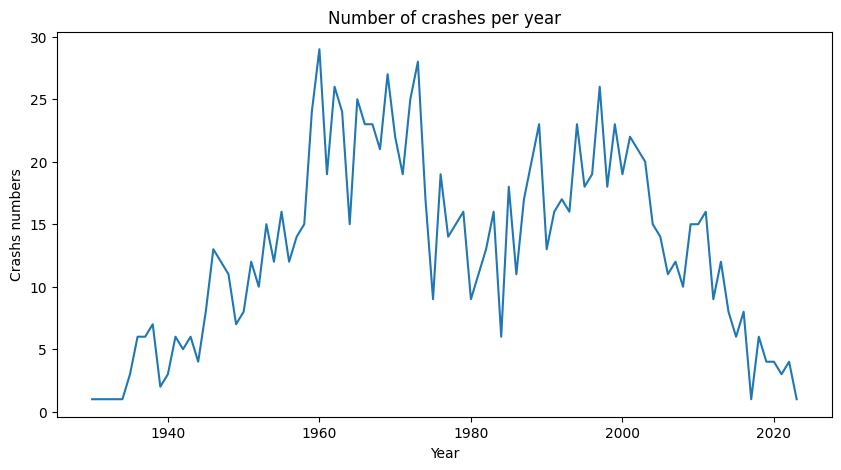

In [32]:
# Analyze the frequency of crashes over time to identify any trends.
# First we extract the year for each date from the Date variable

data_Airplane['Year'] = data_Airplane['Date'].dt.year
# Calculation of crash frequency per year

crashes_per_year = data_Airplane.groupby('Year').size()

# Show first 200 values

print(crashes_per_year.head(200))

import matplotlib.pyplot as plt
# Graphical representation of the number of crashes for each year
crashes_per_year.plot(kind='line', figsize=(10,5), title="Number of crashes per year")
plt.xlabel("Year")
plt.ylabel("Crashs numbers")
plt.show()

This graph(Number of crashes per years) clearly highlights an upward trend in the number of crashes around 2 main periods spanning from 1960 to 1980 and from 1980 to the 2000s.


In [34]:
# 3. Statistical Analysis
import numpy as np
import pandas as pd
import scipy.stats as stats

mean_fatalities = stats.tmean(data_Airplane['Fatalities'])
median_fatalities = np.median(data_Airplane['Fatalities'])
std_fatalities = stats.tstd(data_Airplane['Fatalities'])


data_Airplane['Survival_Rate'] = ((data_Airplane['Aboard'] - data_Airplane['Fatalities']) / data_Airplane['Aboard']) * 100
mean_survival_rate = stats.tmean(data_Airplane['Survival_Rate'])
median_survival_rate = np.median(data_Airplane['Survival_Rate'])
std_survival_rate = stats.tstd(data_Airplane['Survival_Rate'])

print(f"Mean fatalities:{mean_fatalities:.2f}")
print(f"Median_fatalities:{median_fatalities:.2f}")
print(f"std fatalities:{std_fatalities:.2f}")

print(f"Mean survival rate:{mean_survival_rate:.2f}")
print(f"Median survival rate:{median_survival_rate:.2f}")
print(f"std survivale rate:{std_survival_rate:.2f}")

Mean fatalities:44.78
Median_fatalities:24.00
std fatalities:56.48
Mean survival rate:22.25
Median survival rate:0.00
std survivale rate:34.59


 *Interpretation of Fatalities statistic computation:*

 On average, each plane crash resulted in about 45 deaths. This represents the general trend in the data, but it can be influenced by exceptional accidents with very high numbers of deaths.

 Half of the crashes caused 24 or fewer deaths, and the other half caused more than 24. The median is often more representative than a mean when there are extreme values.

 There is a large dispersion of data around the mean. A high standard deviation indicates that the number of crash deaths varies greatly: some crashes are not very fatal (a few deaths), while others are catastrophic (several hundred victims).

 **Interpretation of survival rate statistic computation:**




 If the median is 0%, it means that at least half of the cases have a survival rate of 0%.

The mean is influenced by extreme values, which could increase the mean while keeping the median close to 0%. This suggests that there are a few cases where there are many survivors, but the majority of incidents have a survival rate of 0%.

A standard deviation this high suggests that there is a large variation in survival rates. This is consistent with the previous observation: a large majority of cases with low survival rates (0%), but a few incidents where the survival rate is relatively high.

In [40]:
# Test/Hypotheses:
# filter data by decades

fatalities_1980s = data_Airplane[(data_Airplane['Year'] >= 1980) & (data_Airplane['Year'] < 1990)]['Fatalities']
fatalities_2000s = data_Airplane[(data_Airplane['Year'] >= 2000) & (data_Airplane['Year'] < 2010)]['Fatalities']

# # Perform a Student t-test (independent t-test)
t_stat, p_value = stats.ttest_ind(fatalities_1980s, fatalities_2000s, equal_var=False)

print(f"T-statistic : {t_stat:.2f}")
print(f"P-value : {p_value:.4f}")

# Result interpretation
if p_value < 0.05:
    print(" There is a significant difference between the fatalities of the 1980s and 2000s.")
else:
    print(" No significant difference between the two decades.")

T-statistic : 2.27
P-value : 0.0240
 There is a significant difference between the fatalities of the 1980s and 2000s.


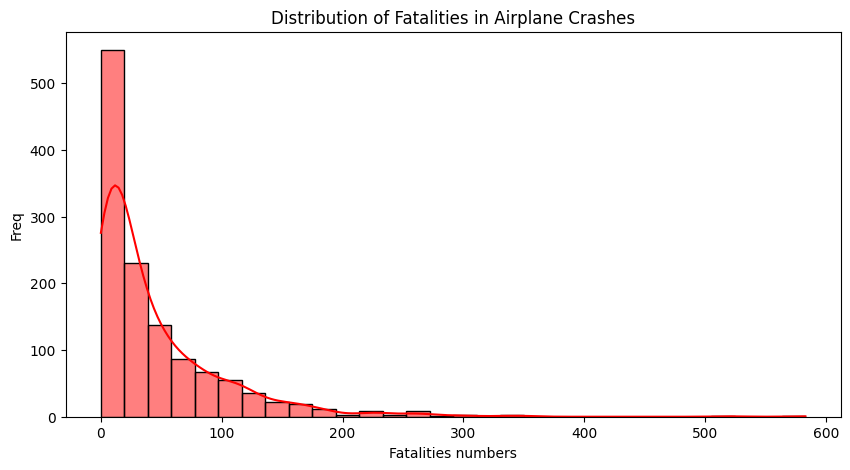

In [36]:
# 4. Visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(data_Airplane['Fatalities'], bins=30, kde=True, color='red')
plt.xlabel("Fatalities numbers")
plt.ylabel("Freq")
plt.title("Distribution of Fatalities in Airplane Crashes")
plt.show()

<ipython-input-38-47c6f7836f3c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crashes_by_region.values, y=crashes_by_region.index, palette="viridis")


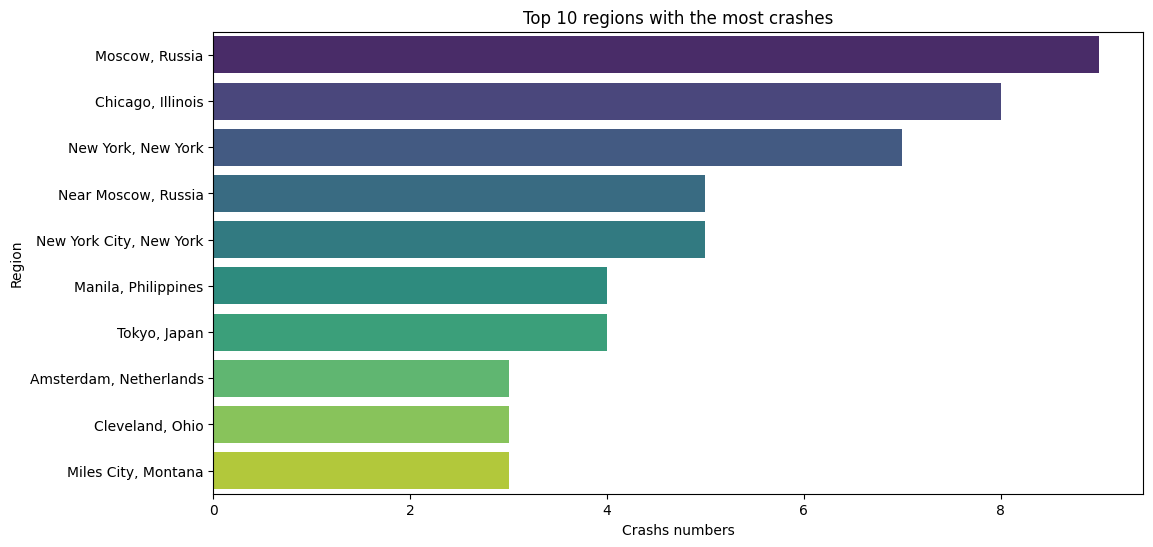

In [38]:
# Crashes by region
plt.figure(figsize=(12,6))
crashes_by_region = data_Airplane['Location'].value_counts().nlargest(10)  # Top 10 régions
sns.barplot(x=crashes_by_region.values, y=crashes_by_region.index, palette="viridis")
plt.xlabel("Crashs numbers")
plt.ylabel("Region")
plt.title("Top 10 regions with the most crashes")
plt.show()

This seaplot shows that the countries/ Region with the highest number of plane crashes are Russia/Moscow, followed by the United States/Chicago.


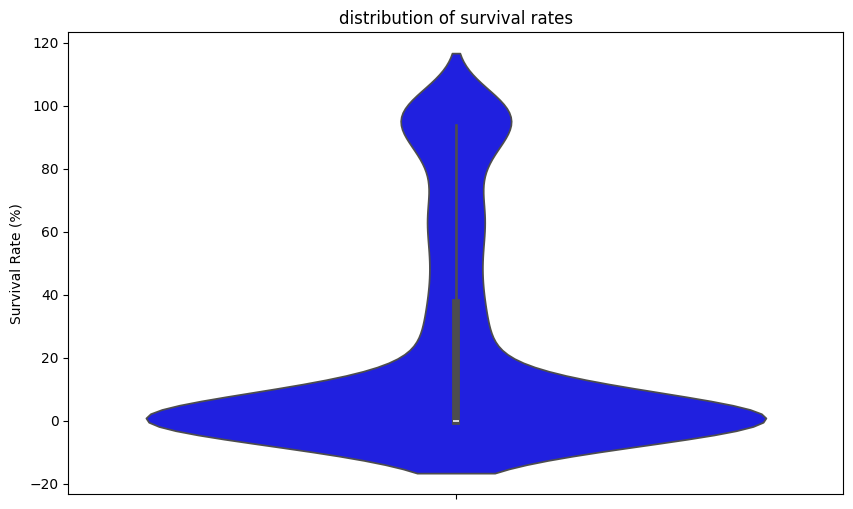

In [39]:
# Seaplot of Survival rates
plt.figure(figsize=(10,6))
sns.violinplot(y=data_Airplane['Survival_Rate'], color="blue")
plt.ylabel("Survival Rate (%)")
plt.title("distribution of survival rates")
plt.show()

  **Seaplot interpretation:**
This seaplot shows a very heterogeneous distribution of survival rate with a significantly wider density of survival rate for fairly low values ​​between 0 and 30%. This means that a very large part of the survival rate values ​​are in this range [0%-30%] and a smaller part of the data is negligibly concentrated on higher values ​​resulting in a lower density.

5.Insight and Report:


Through the various statistical analyses and visual support, we were able to account for a significant heterogeneity on certain variables such as the distribution of the number of crashes across the years with high recorded frequencies of the number of crashes over the decade 60 to 80 and the decade 80 to the early 2000s. As well as a heterogeneity in the distribution of survival rates. The number of crashes was very variable according to certain regions, location with regions of the world more at risk than others such as the United States and Russia.
It was also possible to observe, thanks to a student test, a significant difference in the number of fatalities observed during the 1980s and the 2000s.

Regarding the anomalies encountered:

I encountered a small problem on the Fatalities variable, perhaps due to incorrect handling during upstream data processing